In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.load(r'D:\Cohorts\july_19_audio\audio\2020_07_19_12_58_51_735969\2020_07_19_12_58_51_735969_audio_mic_4.npy')
print (data.shape)

(1250000,)


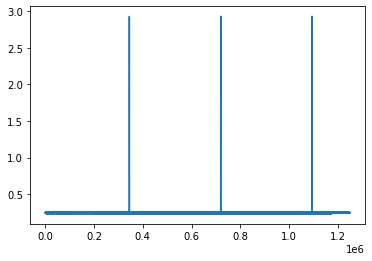

In [4]:
plt.plot( data)#,label=str(k))
plt.show()


0
1
2
3
0
1
2
3


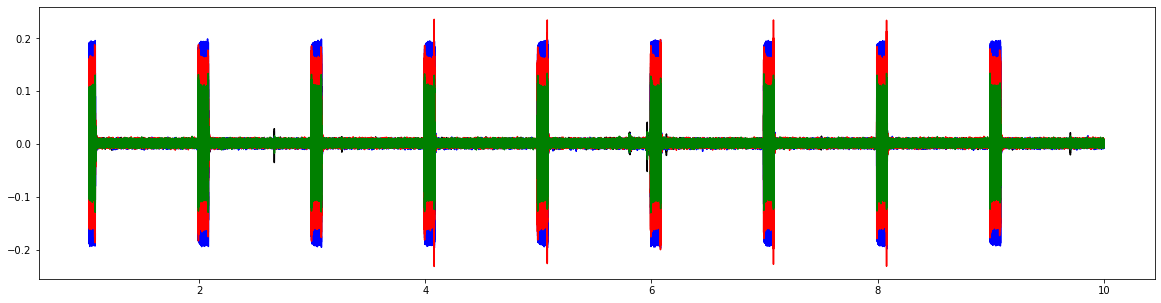

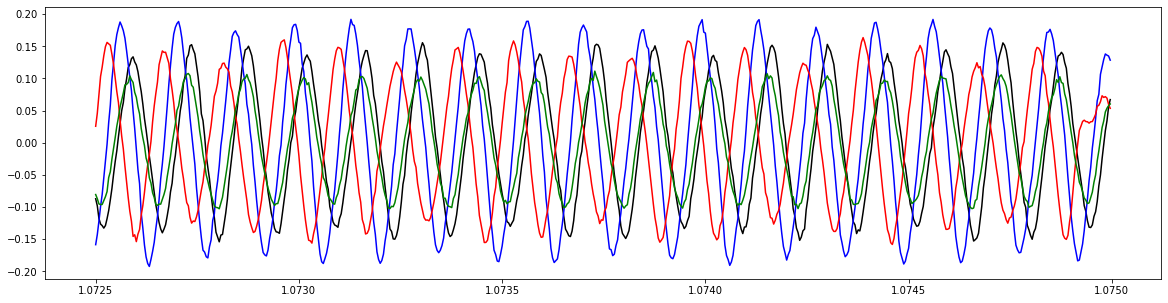

In [69]:
start = int(1.029*250000)
end = int(10.034*250000)
shift = 0.0750
fig1=plt.figure(figsize=(20,5))
t = (np.arange(data[0].shape[0])/250000)[start:end]
clrs=['black','blue','red','green']
for k in range(4):
    #ax=plt.subplot(2,3,k+1)
    print (k)
    plt.plot(t, data[k,start:end],c=clrs[k])#,label=str(k))

fig2=plt.figure(figsize=(20,5))
start = int((0.9975+shift)*250000)
end = int((1.00+shift)*250000)
t = (np.arange(data[0].shape[0])/250000)[start:end]
for k in range(4):
    #ax=plt.subplot(2,3,k+1)
    print (k)
    plt.plot(t, data[k,start:end],c=clrs[k])#,label=str(k))


#plt.legend(fontsize=20)
#plt.ylim(0,6)
plt.show()

In [70]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [71]:
fs=250000
start_fs = 6500
end_fs = 7500
filtered = []
for temp in data:
     filtered.append(butter_bandpass_filter(temp, start_fs, end_fs, fs))  # YOU CAN AUTODETECT THIS
        
filtered = np.array(filtered)
print (filtered.shape)

(5, 2500000)


0
1
2
3
0
1
2
3


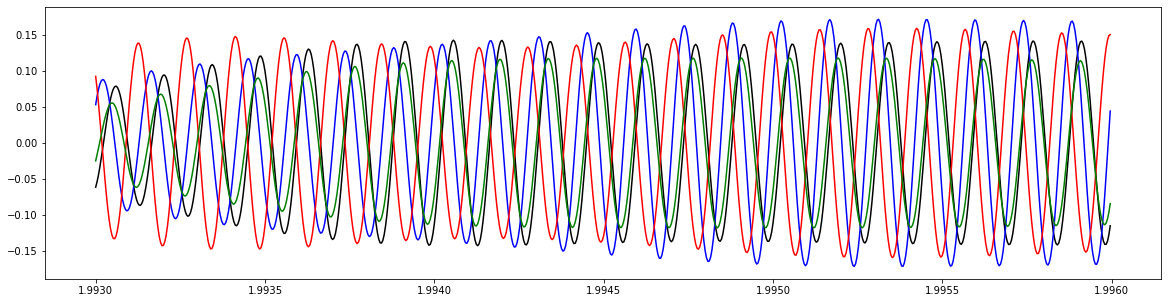

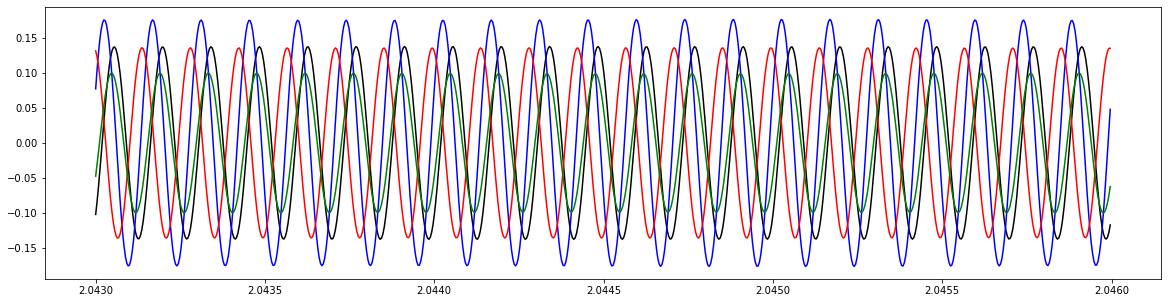

In [79]:
start = int(1.993*250000)
end = int(1.996*250000)
shift = 0.05
fig1=plt.figure(figsize=(20,5))
t = (np.arange(filtered[0].shape[0])/250000)[start:end]
clrs=['black','blue','red','green']
for k in range(4):
    #ax=plt.subplot(2,3,k+1)
    print (k)
    plt.plot(t, filtered[k,start:end],c=clrs[k])#,label=str(k))

fig2=plt.figure(figsize=(20,5))
start = int(start+shift*250000)
end = int(end+shift*250000)

t = (np.arange(filtered[0].shape[0])/250000)[start:end]
for k in range(4):
    #ax=plt.subplot(2,3,k+1)
    print (k)
    plt.plot(t, filtered[k,start:end],c=clrs[k])#,label=str(k))


#plt.legend(fontsize=20)
#plt.ylim(0,6)
plt.show()

In [11]:
duration = 1200
ttl_times_requested = np.float32(np.arange(0,duration, 30))[1:]
ttl_times_requested += np.random.rand(ttl_times_requested.shape[0])*30

print (ttl_times_requested)


[  30.258419   71.44766    91.11275   134.85597   169.94417   181.32135
  238.25719   241.39754   287.6649    313.29623   338.6302    360.01532
  417.75723   428.42563   454.92822   486.04285   534.036     542.34515
  576.74866   627.7273    655.2866    662.3578    707.43494   729.64276
  777.91815   807.298     835.03577   855.00726   890.1776    915.22455
  955.53394   966.4419   1010.5494   1044.9548   1076.0237   1099.5696
 1137.9277   1165.084    1179.7506  ]
